In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.stats import pearsonr
from sklearn import metrics
from sklearn.model_selection import cross_val_score,ShuffleSplit
from sklearn.neural_network import MLPRegressor

import os, sys, math
import matplotlib as mpl
import seaborn as sns
sns.set_context("notebook", font_scale=1.4)

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, KFold, GroupKFold
from scipy.stats import pearsonr, mode
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
import joblib
import pickle

In [2]:
k_sep_norm = pd.read_csv("../storage/k-sep_normalized.tsv",sep="\t")  #protein
ecfp4 = pd.read_csv("../storage/ECFP4.tsv",sep="\t")  #compound
sgtembeds = pd.read_csv('sgt_embeds.csv', index_col='Unnamed: 0')

In [3]:
sgtclusters = pd.read_csv('pro_cluster.csv')
sgtclusters.head()

,target_id,cluster
0,P06213,1
1,P78368,2
2,Q9H2K8,0
3,P49336,2
4,Q6DT37,1


In [4]:
psclusters = pd.read_csv('pssm_pro_cluster.csv')
psclusters.head()

,target_id,cluster
0,Q13547,1
1,Q9BY41,1
2,Q92831,0
3,Q09472,2
4,Q92793,2


In [5]:
sgtembeds.shape, sgtclusters.shape, k_sep_norm.shape, psclusters.shape

((204, 401), (204, 2), (4287, 401), (4287, 2))

In [6]:
sgtembeds = sgtembeds.merge(sgtclusters,on="target_id")
sgtembeds.head()

,target_id,0,1,2,3,4,5,6,7,8,...,391,392,393,394,395,396,397,398,399,cluster
0,P06213,0.215062,0.203091,0.180683,0.198066,0.171366,0.188681,0.193831,0.172092,0.199483,...,0.187856,0.169934,0.198071,0.190562,0.177598,0.187509,0.198230,0.196648,0.192867,1
1,P78368,0.079285,0.004321,0.236577,0.213020,0.004000,0.244418,0.089572,0.252362,0.208389,...,0.223962,0.030206,0.220780,0.230988,0.080210,0.206182,0.247487,0.095402,0.217688,2
2,Q9H2K8,0.202843,0.078705,0.204041,0.194296,0.071651,0.214227,0.203855,0.206597,0.179541,...,0.198795,0.011310,0.182349,0.214013,0.192200,0.026675,0.010142,0.257809,0.211540,0
3,P49336,0.207967,0.237654,0.230337,0.223728,0.214036,0.204381,0.084948,0.222819,0.199139,...,0.085967,0.215828,0.221116,0.215934,0.221184,0.223420,0.029879,0.004575,0.010838,2
4,Q6DT37,0.188301,0.187365,0.179571,0.192665,0.183457,0.190285,0.174676,0.185862,0.192370,...,0.073716,0.173434,0.177409,0.062972,0.068286,0.197220,0.194040,0.001428,0.206309,1


In [7]:
k_sep_norm = k_sep_norm.merge(psclusters,on="target_id")
k_sep_norm.head()

,target_id,k_separated_bigrams_pssm0,k_separated_bigrams_pssm1,k_separated_bigrams_pssm2,k_separated_bigrams_pssm3,k_separated_bigrams_pssm4,k_separated_bigrams_pssm5,k_separated_bigrams_pssm6,k_separated_bigrams_pssm7,k_separated_bigrams_pssm8,...,k_separated_bigrams_pssm391,k_separated_bigrams_pssm392,k_separated_bigrams_pssm393,k_separated_bigrams_pssm394,k_separated_bigrams_pssm395,k_separated_bigrams_pssm396,k_separated_bigrams_pssm397,k_separated_bigrams_pssm398,k_separated_bigrams_pssm399,cluster
0,Q13547,0.107481,0.128812,0.081213,0.140111,0.071316,0.081507,0.108822,0.121666,0.136102,...,0.058263,0.069988,0.047662,0.078000,0.069114,0.052984,0.067934,0.042231,0.041590,1
1,Q9BY41,0.094796,0.100401,0.057654,0.091992,0.059848,0.054790,0.071760,0.115063,0.110756,...,0.031006,0.065345,0.045518,0.050494,0.050698,0.038563,0.048614,0.040782,0.043202,1
2,Q92831,0.131170,0.159737,0.141817,0.167542,0.107332,0.153498,0.148839,0.099001,0.139122,...,0.107104,0.099013,0.135464,0.116718,0.107386,0.083731,0.066814,0.092070,0.055836,0
3,Q09472,0.302940,0.411045,0.540288,0.382354,0.289143,0.973024,0.295314,0.471003,0.588330,...,0.229511,0.469584,0.173613,0.564296,0.341439,0.230679,0.151048,0.150616,0.138093,2
4,Q92793,0.306003,0.410826,0.553786,0.369167,0.289833,1.000000,0.291937,0.479004,0.580453,...,0.227153,0.470394,0.169796,0.592787,0.344472,0.226170,0.147799,0.157863,0.137990,2


In [8]:
#train dataset
df_tr = pd.read_csv("../storage/traincomps.tsv",sep="\t")

In [9]:
#train dataset with protein-compound feature vectors
pssm = df_tr.merge(k_sep_norm,on="target_id").merge(ecfp4,on="compound_id")
sgt = df_tr.merge(sgtembeds,on="target_id").merge(ecfp4,on="compound_id")

In [10]:
pssm.head()

,compound_id,target_id,pchembl_value,k_separated_bigrams_pssm0,k_separated_bigrams_pssm1,k_separated_bigrams_pssm2,k_separated_bigrams_pssm3,k_separated_bigrams_pssm4,k_separated_bigrams_pssm5,k_separated_bigrams_pssm6,...,ECFP4.1015,ECFP4.1016,ECFP4.1017,ECFP4.1018,ECFP4.1019,ECFP4.1020,ECFP4.1021,ECFP4.1022,ECFP4.1023,ECFP4.1024
0,CHEMBL1000,Q02763,4.05,0.132645,0.246746,0.191735,0.210505,0.210938,0.130516,0.154157,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL103667,Q02763,7.70,0.132645,0.246746,0.191735,0.210505,0.210938,0.130516,0.154157,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL103667,P12931,4.46,0.062425,0.136338,0.085795,0.097171,0.050512,0.078817,0.086594,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL103667,P35968,5.50,0.108654,0.241820,0.227927,0.240146,0.144558,0.159763,0.186377,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL103667,P09619,5.96,0.098823,0.214194,0.193479,0.199802,0.115261,0.139842,0.162413,...,0,0,0,0,0,0,0,0,0,0


In [11]:
pssm.shape

(87769, 1428)

In [12]:
print(sgt.shape)
sgt.head()

(87769, 1428)


,compound_id,target_id,pchembl_value,0,1,2,3,4,5,6,...,ECFP4.1015,ECFP4.1016,ECFP4.1017,ECFP4.1018,ECFP4.1019,ECFP4.1020,ECFP4.1021,ECFP4.1022,ECFP4.1023,ECFP4.1024
0,CHEMBL1000,Q02763,4.05,0.192822,0.211333,0.194378,0.193421,0.212838,0.198222,0.073880,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL103667,Q02763,7.70,0.192822,0.211333,0.194378,0.193421,0.212838,0.198222,0.073880,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL103667,P12931,4.46,0.221785,0.076431,0.218826,0.207455,0.224760,0.206100,0.216464,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL103667,P35968,5.50,0.195055,0.197929,0.179309,0.160953,0.203582,0.184688,0.073640,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL103667,P09619,5.96,0.176590,0.211499,0.188480,0.206389,0.201014,0.189005,0.206246,...,0,0,0,0,0,0,0,0,0,0


In [13]:
sgt.cluster.value_counts()

1    47487
0    29678
2    10604
Name: cluster, dtype: int64

In [14]:
pssm.cluster.value_counts()

0    50265
1    33676
2     3828
Name: cluster, dtype: int64

In [16]:
# keep some as test set
# pstrain, sgtrain = pssm.iloc[:60000,:], sgt.iloc[:60000,:]
# pstest, sgtest = pssm.iloc[60000:,:], sgt.iloc[60000:,:]
# pstrain.shape, pstest.shape, sgtrain.shape, sgtest.shape

In [15]:
def rf_predictor(encoder, ax, name, predict):
    predictions, truths = [], []
    
    for ind in range (0,3):
        data = encoder[encoder.cluster == ind]
        X = data.drop(['compound_id', 'target_id', 'pchembl_value', 'cluster'], axis=1)
        y = data['pchembl_value']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        reg = RandomForestRegressor(n_estimators=100,max_features=0.33,random_state=42)
        reg.fit(X_train, y_train)
        predictions += reg.predict(X_test).tolist()
        truths += y_test.tolist()
        #joblib.dump(reg, f'{i}RFfor{ind}cluster.pkl')

    
    dfdict = {'True Value': truths, 'Predicted Value': predictions}
    df = pd.DataFrame(dfdict)
    
    predict[name[i]] = df
    df.plot('True Value', "Predicted Value" ,kind='scatter',s=20, ax=ax, color="green", alpha=0.4)
    ax.plot((0,10), (0,10), ls="--", lw=2, c=".2", color='red')
    ax.set_xlim((2,10));  ax.set_ylim((2,10))
    pcorr = pearsonr(df['True Value'], df['Predicted Value'])[0]
    mse = mean_squared_error(df['True Value'], df['Predicted Value'])
    ax.set_title(name[i])
    ax.text(9,2.5,'pcorr=%s' %round(pcorr,2), style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
    ax.text(9,3.5,'mse=%s' %round(mse,2), style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
    sns.despine()

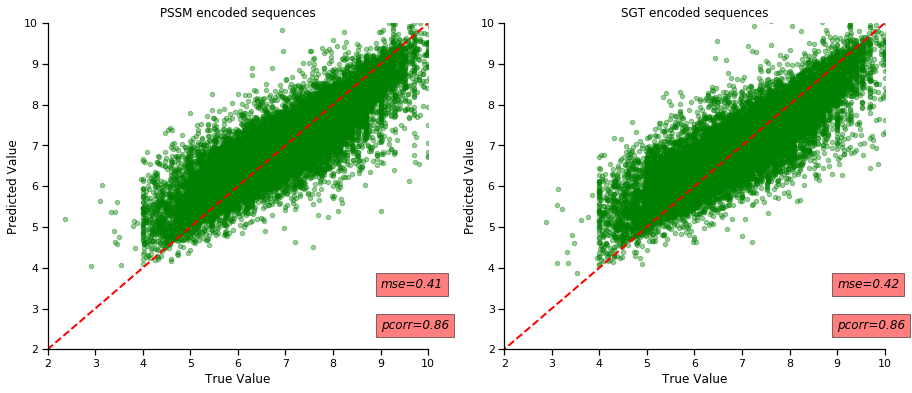

In [16]:
rf_predict = {}
sns.set_context('notebook')
encs=[pssm, sgt]
fig,axs=plt.subplots(1,2,figsize=(15,6))
axs=axs.flat
i=0
for enc in encs:
    rf_predictor(enc,ax=axs[i], name = ['PSSM encoded sequences','SGT encoded sequences'], predict= rf_predict)
    i+=1

# MLP rergessor

In [25]:
def MLP_predictor(encoder, ax, name, predict):
    predictions, truths = [], []
    
    for ind in range (0,3):
        data = encoder[encoder.cluster == ind]
        X = data.drop(['compound_id', 'target_id', 'pchembl_value', 'cluster'], axis=1)
        y = data['pchembl_value']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        reg = MLPRegressor(hidden_layer_sizes=(50), alpha=0.01, max_iter=500,
                        activation='relu', solver='lbfgs', random_state=2)
        reg.fit(X_train, y_train)
        predictions += reg.predict(X_test).tolist()
        truths += y_test.tolist()
        joblib.dump(reg, f'{i}MLPfor{ind}cluster.pkl')

    
    dfdict = {'True Value': truths, 'Predicted Value': predictions}
    df = pd.DataFrame(dfdict)
    
    predict[name[i]] = df
    df.plot('True Value', "Predicted Value" ,kind='scatter',s=20, ax=ax, color="green", alpha=0.3)
    ax.plot((0,10), (0,10), ls="--", lw=2, c=".2", color='red')
    ax.set_xlim((2,10));  ax.set_ylim((2,10))
    pcorr = pearsonr(df['True Value'], df['Predicted Value'])[0]
    mse = mean_squared_error(df['True Value'], df['Predicted Value'])
    ax.set_title(name[i])
    ax.text(9,2.5,'pcorr=%s' %round(pcorr,2),style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
    ax.text(9,3.5,'mse=%s' %round(mse,2), style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
    sns.despine()

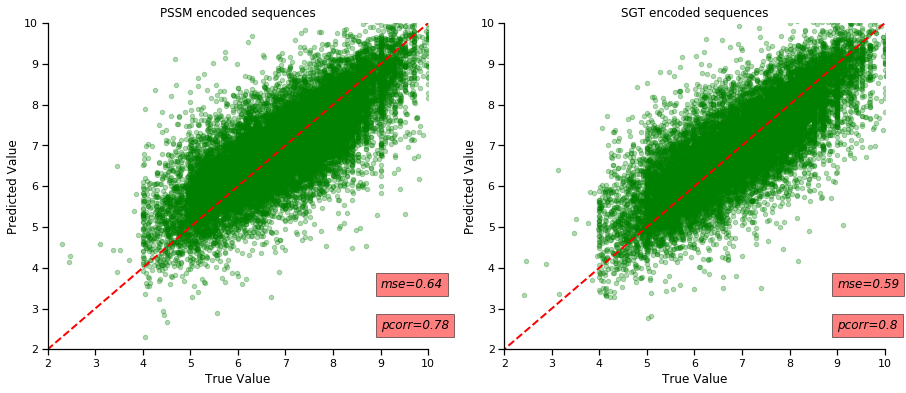

In [26]:
MLP_predict = {
sns.set_context('notebook')
encs=[pssm, sgt]
fig,axs=plt.subplots(1,2,figsize=(15,6))
axs=axs.flat
i=0
for enc in encs:
    MLP_predictor(enc,ax=axs[i], name = ['PSSM encoded sequences','SGT encoded sequences'], predict= rf_predict)
    i+=1